# Regression with TensorFlow

Predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.2.0'

### Creating some data to view and fit

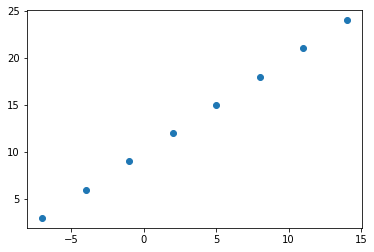

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualiza it
plt.scatter(X, y)

In [5]:
# The relationship between X and y is y = X+10

y == X+10

# This is the function we want our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Inputs and outputs shapes

In [6]:
# Create a demo tensor for a mock housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
# What is input and output shapes for our created X and y?
# We want one feature to predict one label, so we take the [0] index.
# We'll get empty shapes because we just have a list of scalars.
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [14]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFòpw

1. **Creating a model** - define the input and output layers, as well as the hidden layers.
2. **Compiling a model** - define the loss function, the optimizer and evaluation metrics.
3. **Fitting a model** - letting the model try to find patterns between X and y.
4. **Evaluate a model**

In [15]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model usin the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # SGD = Stochastic Gradient Descent
              metrics=["mae"]
             )

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 886us/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 829us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 814us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 667us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 959us/step - loss: 10.9748 - mae: 10.9748


In [16]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving the model
The model is far off, but we can have guessed it by looking at the loss and metric in the
training phase.
We can improve a model by altering any of the three steps we took to create it.
1. **Creating a model** - here we can add more layers, increase the number of hidden units within each of the hidden layer, change the activation function of each layer.
2. **Compiling a model** - here we can change the optimization function or the learning rate.
3. **Fitting a model** - fit a model for more epochs or on more data.

In [19]:
# Rebuild the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 940us/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 906us/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 768us/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 866us/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 740us/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 615us/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 938us/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 967us/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [=========================

1/1 [==============================] - 0s 950us/step - loss: 6.9600 - mae: 6.9600
Epoch 88/100
1/1 [==============================] - 0s 640us/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 653us/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 705us/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 822us/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 650us/step - loss: 6.9262 - mae: 6.9262
Epoch 94/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 843us/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 873us/step - l

In [20]:
# Prediction should have improved (mae is now 6.8)
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [22]:
# Rebuild the model

# 1. Create the model (this time adding a hidden layer with relu activation)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 767us/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 707us/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 908us/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 726us/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 875us/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 727us/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 812us/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 808us/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 817us/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 1ms/step - loss: 3.7284 - mae: 3.7284
Epoch 88/100
1/1 [==============================] - 0s 927us/step - loss: 3.7416 - mae: 3.7416
Epoch 89/100
1/1 [==============================] - 0s 653us/step - loss: 3.7013 - mae: 3.7013
Epoch 90/100
1/1 [==============================] - 0s 708us/step - loss: 3.7505 - mae: 3.7505
Epoch 91/100
1/1 [==============================] - 0s 775us/step - loss: 3.6921 - mae: 3.6921
Epoch 92/100
1/1 [==============================] - 0s 689us/step - loss: 3.7522 - mae: 3.7522
Epoch 93/100
1/1 [==============================] - 0s 679us/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 709us/step - loss: 3.7251 - mae: 3.7251
Epoch 95/100
1/1 [==============================] - 0s 739us/step - loss: 3.7105 - mae: 3.7105
Epoch 96/100
1/1 [==============================] - 0s 936us/step - loss: 3.6979 - mae: 3.6979
Epoch 97/100
1/1 [==============================] - 0s 869us/step

In [23]:
# Prediction should be even better (mae is now around 3.5)
model.predict([17.0])

array([[31.223137]], dtype=float32)

Seems like the previous model get closer to the actual result we want (27). Why?

It can be that our model is overfitting, meaning is learning too well on the training data and it's not able to generalize well on new data.

The metrics we see during training can not be representative of actual how well the model is working: the real evaluation comes from the prediction of data the model hasn't seen before.

Tweaking the 